# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold

# Automated Data Ingestion

In [2]:
X = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data", sep=' ', header=None)
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data", sep=' ', header=None).iloc[:, 0]

# Visualizing Sparsity (Missing Values)

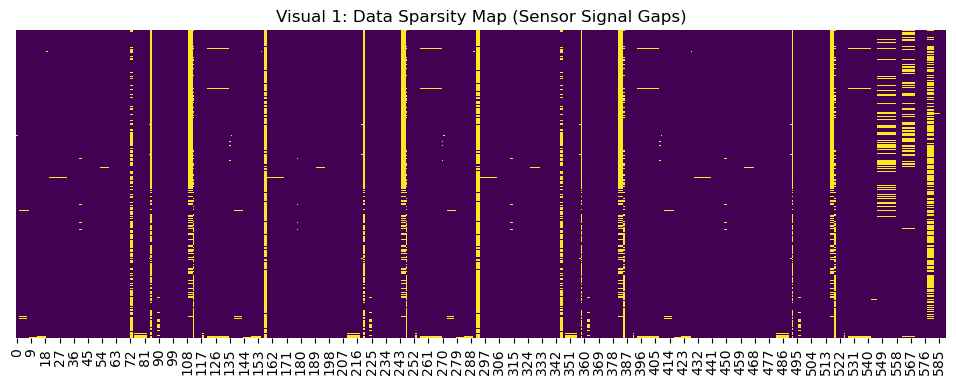

In [3]:
plt.figure(figsize=(12, 4))
sns.heatmap(X.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Visual 1: Data Sparsity Map (Sensor Signal Gaps)")
plt.show()

# Cleaning

In [4]:
# We remove sensors that are 'dead' (constant values)
selector = VarianceThreshold(threshold=0)
X_filt = X.loc[:, selector.fit(X).get_support()]
print(f"Informative Sensors: {X_filt.shape[1]} (Removed {X.shape[1] - X_filt.shape[1]} constant signals)")

Informative Sensors: 474 (Removed 116 constant signals)


# KNN Imputation to fill gaps based on similar wafer patterns

In [5]:
# Using similar wafer profiles to mathematically estimate missing sensor data
print("Executing KNN Imputation (k=5)...")
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_filt), columns=X_filt.columns)


Executing KNN Imputation (k=5)...


# Save the cleaned data

In [6]:
X_imputed['target'] = y.values
X_imputed.to_csv('secom_clean.csv', index=False)
print("Notebook 1 Complete: Data saved to 'secom_clean.csv'")

Notebook 1 Complete: Data saved to 'secom_clean.csv'
